Define these constants:

In [34]:
LOAD_FILES_CAP = None  # for testing load only some files (loading slow)
# LOAD_FILES_CAP = None
output_root = '/Users/adam/pschool/bakalarka/cryptic_output/output'  # unzipped tree with json outputs

In [35]:
import json
from pathlib import Path
from typing import Iterable

import pandas as pd


def load_df(json_files: Iterable[Path]):
    super_df = pd.DataFrame()

    json_files = list(json_files)
    if LOAD_FILES_CAP:
        json_files = list(json_files)[:LOAD_FILES_CAP]  # testing hack

    total_files = len(json_files)

    for i, json_file in enumerate(json_files):
        with json_file.open() as f:
            json_output = json.load(f)

        df = pd.json_normalize(json_output, 'binding_sites', ['apo_pdb_code', 'holo_pdb_code', 'apo_chain_id', 'holo_chain_id'])
        super_df = pd.concat([super_df, df], ignore_index=True)

        if i % 10 == 0:
            print(f'\rloading... {i} / {total_files} done', end='')

    return super_df

In [36]:
files = Path(output_root).rglob('*.json')

df = load_df(files)

loading... 2540 / 2542 done

In [37]:
# je klidne vetsi nez pocet paru, protoze je radek za kazdy ligand, nikoliv pár...
df

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,analyses.method4.apo_bs_blocked_residues__by_blocking_atoms,atom_count_statistic.binding_atoms,atom_count_statistic.binding_atoms_observed_in_apo,atom_count_statistic.atoms_of_binding_residues_in_both,atom_count_statistic.atoms_of_binding_residues_missing_in_holo,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id
0,RFT,[157],0.235313,0.255749,0.255749,108.813930,106.436640,1,1,1,...,1,6,6,6,0,4,6wyg,6wyf,A,A
1,RFT,"[164, 45, 94]",0.577257,0.614879,0.614879,82.939834,85.420435,0,0,0,...,0,3,3,17,0,4,6wyg,6wyh,A,B
2,RFT,[157],0.317696,0.314098,0.314098,108.550272,109.494690,0,0,0,...,0,5,5,6,0,0,6wyg,6wyh,A,B
3,RFT,[157],0.346098,0.366367,0.366367,108.722998,106.436640,0,0,0,...,0,6,6,6,0,4,6wyg,6wyf,C,A
4,RFT,"[164, 45, 94]",0.730723,0.849326,0.849326,87.476912,85.420435,0,0,0,...,0,3,3,17,0,4,6wyg,6wyh,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471139,IXZ,"[217, 116, 35, 81, 304, 221, 219, 33, 79, 226,...",35.815914,35.041840,35.041840,383.087170,397.146905,5,4,5,...,1,35,35,118,103,0,5p3l,3wz6,A,A
1471140,IXY,"[302, 37, 33, 79, 125, 221, 116, 35, 119, 304,...",35.949269,35.866933,35.866933,465.143603,498.159988,19,16,10,...,3,41,41,159,143,0,5p3l,3wz7,A,A
1471141,IXV,"[83, 300, 33, 80, 10, 222, 226, 79, 221, 116, ...",54.334508,54.377497,54.377497,453.171410,445.745519,8,6,7,...,1,36,36,140,121,0,5p3l,3wz8,A,A
1471142,PEG,"[68, 90, 67, 62, 61, 69]",54.554148,54.548213,54.548213,142.983098,131.290774,3,3,3,...,0,13,13,44,41,3,5p3l,3wz8,A,A


In [43]:
print('binding sites', len(df))
print()
print('unique pairs', len(df[['apo_pdb_code', 'holo_pdb_code', 'apo_chain_id', 'holo_chain_id']].drop_duplicates()))
print('unique apo chains', len(df[['apo_pdb_code', 'apo_chain_id']].drop_duplicates()))
print('unique holo chains', len(df[['holo_pdb_code', 'holo_chain_id']].drop_duplicates()))
print('unique apo structures', df['apo_pdb_code'].nunique())
print('unique holo structures', df['holo_pdb_code'].nunique())

binding sites 1471144

unique pairs 796751
unique apo chains 24334
unique holo chains 43817
unique apo structures 13945
unique holo structures 24893


In [38]:
# pro histogram podílu blocked_BS_atoms / BS_atoms

df['blocked_bs_atoms__ratio'] = df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] / df['atom_count_statistic.binding_atoms_observed_in_apo']

df['bs_residue_count'] = df.residue_ids.apply(len)

df['blocked_bs_residues__ratio'] = df['analyses.method4.apo_bs_blocked_residues__by_blocking_atoms'] / df.bs_residue_count


In [39]:
df

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,atom_count_statistic.atoms_of_binding_residues_in_both,atom_count_statistic.atoms_of_binding_residues_missing_in_holo,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio
0,RFT,[157],0.235313,0.255749,0.255749,108.813930,106.436640,1,1,1,...,6,0,4,6wyg,6wyf,A,A,0.166667,1,1.000000
1,RFT,"[164, 45, 94]",0.577257,0.614879,0.614879,82.939834,85.420435,0,0,0,...,17,0,4,6wyg,6wyh,A,B,0.000000,3,0.000000
2,RFT,[157],0.317696,0.314098,0.314098,108.550272,109.494690,0,0,0,...,6,0,0,6wyg,6wyh,A,B,0.000000,1,0.000000
3,RFT,[157],0.346098,0.366367,0.366367,108.722998,106.436640,0,0,0,...,6,0,4,6wyg,6wyf,C,A,0.000000,1,0.000000
4,RFT,"[164, 45, 94]",0.730723,0.849326,0.849326,87.476912,85.420435,0,0,0,...,17,0,4,6wyg,6wyh,C,B,0.000000,3,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471139,IXZ,"[217, 116, 35, 81, 304, 221, 219, 33, 79, 226,...",35.815914,35.041840,35.041840,383.087170,397.146905,5,4,5,...,118,103,0,5p3l,3wz6,A,A,0.028571,15,0.066667
1471140,IXY,"[302, 37, 33, 79, 125, 221, 116, 35, 119, 304,...",35.949269,35.866933,35.866933,465.143603,498.159988,19,16,10,...,159,143,0,5p3l,3wz7,A,A,0.073171,20,0.150000
1471141,IXV,"[83, 300, 33, 80, 10, 222, 226, 79, 221, 116, ...",54.334508,54.377497,54.377497,453.171410,445.745519,8,6,7,...,140,121,0,5p3l,3wz8,A,A,0.083333,18,0.055556
1471142,PEG,"[68, 90, 67, 62, 61, 69]",54.554148,54.548213,54.548213,142.983098,131.290774,3,3,3,...,44,41,3,5p3l,3wz8,A,A,0.000000,6,0.000000


<AxesSubplot:xlabel='blocked_bs_atoms__ratio', ylabel='Proportion'>

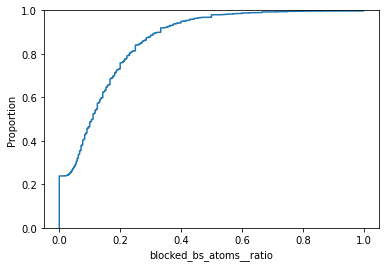

In [40]:
import seaborn as sns

sns.ecdfplot(df, x='blocked_bs_atoms__ratio')

<AxesSubplot:xlabel='blocked_bs_residues__ratio', ylabel='Proportion'>

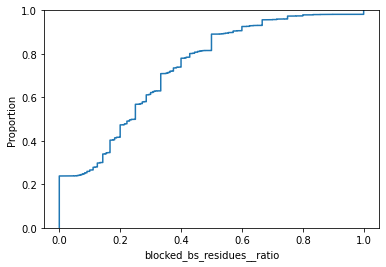

In [41]:
sns.ecdfplot(df, x='blocked_bs_residues__ratio')

todo agregace (binding sites, to je to, co je v tom df/grafu) podle párů (asi max toho poměru), a pak podle apo struktur asi (kolik apo struktur má cryptic binding sites), to pak buď podle max, nebo avg všech s těmi různými holo protějšky (asi max, avg by nefungovalo dobře, pokud by se lišily počty BS v parech se stejnou apo, což teoreticky mohou).